# Lesson 42: Reading Excel Spreadsheets

In [1]:
import openpyxl as xl

In [2]:
workbook = xl.load_workbook('Excel.xlsx')

In [3]:
type(workbook)

openpyxl.workbook.workbook.Workbook

In [4]:
sheet = workbook.get_sheet_by_name('Sheet1')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


In [5]:
type(sheet)

openpyxl.worksheet.worksheet.Worksheet

In [6]:
# Get names of Sheet in Excel

workbook.get_sheet_names()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  This is separate from the ipykernel package so we can avoid doing imports until


['Sheet1', 'Sheet2', 'Sheet3']

In [9]:
sheet['A1']

<Cell 'Sheet1'.A1>

In [10]:
sheet['A1'].value

datetime.datetime(2015, 4, 5, 13, 34, 2)

In [11]:
str(sheet['A1'].value)

'2015-04-05 13:34:02'

In [12]:
str(sheet['B1'].value)

'Apples'

In [13]:
str(sheet['C1'].value)

'73'

In [15]:
sheet.cell(row=1, column=2)

<Cell 'Sheet1'.B1>

In [16]:
for i in range(1, 8):
    print(i, sheet.cell(row=i, column=2).value)

1 Apples
2 Cherries
3 Pears
4 Oranges
5 Apples
6 Bananas
7 Strawberries


In [17]:
for i in range(1, 8):
    print(i, sheet.cell(row=i, column=1).value)

1 2015-04-05 13:34:02
2 2015-04-05 03:41:23
3 2015-04-06 12:46:51
4 2015-04-08 08:59:43
5 2015-04-10 02:07:00
6 2015-04-10 18:10:37
7 2015-04-10 02:40:46


In [18]:
for i in range(1, 8):
    print(i, sheet.cell(row=i, column=3).value)

1 73
2 85
3 14
4 52
5 152
6 23
7 98


Lesson 42 Recap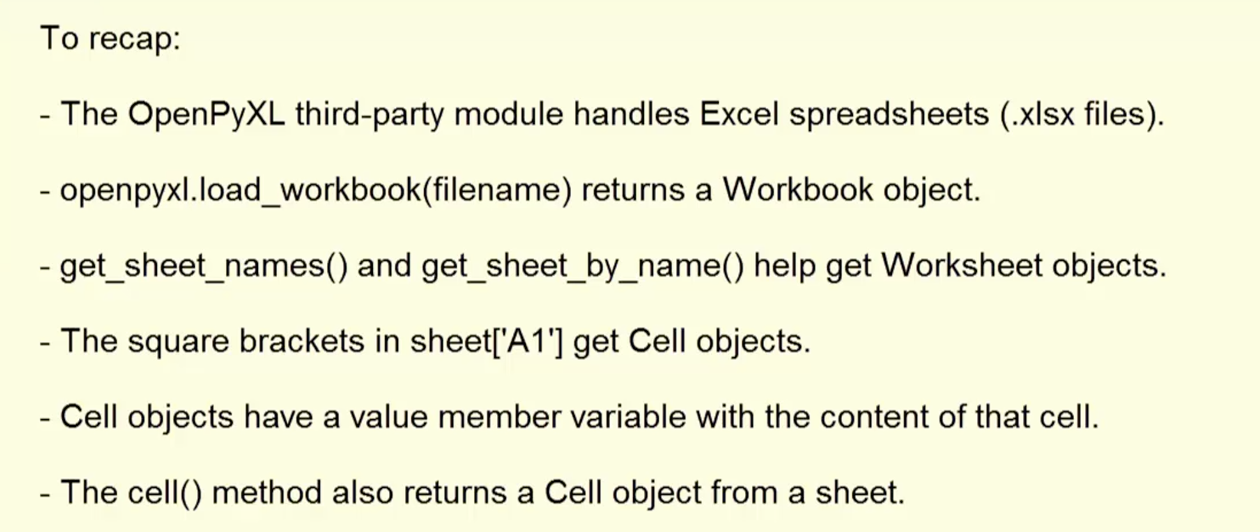

# Lesson 43: Editing Excel Spreadsheets

In [19]:
import openpyxl as xl

In [21]:
wb = xl.Workbook()
wb

In [22]:
wb.get_sheet_names()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


['Sheet']

In [23]:
sheet = wb.get_sheet_by_name('Sheet')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


In [24]:
sheet

<Worksheet "Sheet">

In [25]:
# Blank

sheet['A1'].value

In [26]:
sheet['A1'] = 42

In [27]:
sheet['A2'] = 'Hello'

In [28]:
# Save this NEW workbook, currently in memory, to a file

wb.save('excel2.xlsx')

In [29]:
sheet2 = wb.create_sheet()

In [30]:
wb.get_sheet_names()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


['Sheet', 'Sheet1']

In [31]:
sheet2.title

'Sheet1'

In [32]:
sheet2.title = 'My New Sheet Name'

In [33]:
wb.get_sheet_names()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


['Sheet', 'My New Sheet Name']

In [34]:
wb.save('excel3.xlsx')

In [35]:
# Placed new sheet in a different order

wb.create_sheet(index=0, title='My Other Sheet')

<Worksheet "My Other Sheet">

### Best to Save Workbook as a New Excel File

In [36]:
wb.save('excel4.xlsx')

# Lesson 44: Reading and Editing PDFs

pip install PyPDF2

This is able to extract text, NOT images

In [40]:
import PyPDF2 as py2

In [41]:
# Read Binary Mode, since PDF is a binary file

pdfFile = open('meetingminutes1.pdf', 'rb')

In [42]:
reader = py2.PdfFileReader(pdfFile)

In [43]:
# Check pages

reader.numPages

19

In [44]:
# Return a page object

page = reader.getPage(0)

In [46]:
# Looks at text, get Python string

page.extractText()

'OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS   Meeting of \nMarch 7\n, 2014\n        \n     The Board of Elementary and Secondary Education shall provide leadership and \ncreate policies for education that expand opportunities for children, empower \nfamilies and communities, and advance Louisiana in an increasingly \ncompetitive glob\nal market.\n BOARD \n of ELEMENTARY\n and \n SECONDARY\n EDUCATION\n  '

In [47]:
# Loop over pages to get all text

for pageNum in range(reader.numPages):
    print(reader.getPage(pageNum).extractText())

OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS   Meeting of 
March 7
, 2014
        
     The Board of Elementary and Secondary Education shall provide leadership and 
create policies for education that expand opportunities for children, empower 
families and communities, and advance Louisiana in an increasingly 
competitive glob
al market.
 BOARD 
 of ELEMENTARY
 and 
 SECONDARY
 EDUCATION
  
 LOUISIANA STATE BOARD OF ELEMENTARY AND SECONDARY EDUCATION
   MARCH 7, 2014
  
 The Louisiana Purchase Room
  Baton Rouge, LA
   
 
 
The Louisiana State Board of Elementary and Secondary Education met in 
regular
 session on
 March 7, 2014
, in the Louisiana Purcha
se Room, located in the Claiborne 
Building in Baton Rouge, Louisiana.  The meeting was called to order at 
9:17 a.m.
 by 
Board President 
Chas Roemer
 and opened with a prayer by
 Ms. Terry Johnson, Bossier 
Parish School System
.  
Board members present were 
Dr. Lottie Beebe, Ms. Holly Boffy, Mr. Jim Garvey, Mr.
 Jay 
Guillot, Ms.

BOARD MINUTES
 -7- MARCH 7, 2014
   Funds may be used to provide professional development, stabilize school 
staffing during the transformation process, provide for additional staffi
ng 
resources needed to successfully transition a direct
-run school to a charter 
school, and other activities that support the development of a high 
performing charter 
school 
environment.
  Dr. Beebe recused herself from voting on this item.
    5.2.
14 Depar
tmental Support 
- Other
  On motion of Mr. Guillot, seconded by Mr. Lee, 
the Board approve
d the 
following allocation:
   Allocation:
  Educator Leader Cadre Substitute Reimbursement
 Amount:
  $1,893.36
 Funding Period:
 10/01/
2013 - 12/13/2014
 Source of Funds:
 Federal
  Purpose:  The purpose of the Teacher Leader Advisors is to develop an 
understanding of the changes required of Common Core and Compass, 
including reviewing and creating materials for implementation
, serving as 
a Common Core expert
, assisting in bui
lding a growing net

BOARD MINUTES
 -15- MARCH 7, 2014
    5.2.
32 On motion of Mr. Guillot, seconded by Mr. Lee, 
the Board 
approved
 the 
following RSD contract amendment:
  Contractor:
   VergesRome Architects, APAC
 Contract Period:
  09/16/2010 
- 09/16/2015
 Previous Amount:
  $944,413.20
 Amended Amount:
  $38,546.20
 Contract Amount:
  $982,959.40
 Fund:
    IAT 
- FEMA 
 Competitive Proce
ss: Competitive
  Description of Service:  This amendment adjusts the 
designer™s 
fee for 
basic 
services for 
mothballing of 
closed 
schools 
- safe and 
secure at 
George Mondy Elementary School based on the revised AFC.  The 
project was canceled
, but is now bei
ng reinstated by the 
owner
, and additional scope of work is being added to the project.  It also provides for 
the addition of a new project and project number 
for d
emolition of 
the 
caretaker™s 
cottage at George Mondy Elementary School and 
at 
Andrew 
J. Bell
 Junior 
High School.
  5.2.
33 On motion of Mr. Guillot, seconded by Mr. Lee, 
t

In [49]:
# Combine Pages from MeetingMinutes 1 and 2

import PyPDF2

file1 = open('meetingminutes1.pdf', 'rb')
file2 = open('meetingminutes2.pdf', 'rb')

reader1 = PyPDF2.PdfFileReader(file1)
reader2 = PyPDF2.PdfFileReader(file2)

In [51]:
# Create a new PDF document. Exists in memory only for now.

write = PyPDF2.PdfFileWriter()

In [52]:
for pageNum in range(reader1.numPages):
    page = reader1.getPage(pageNum)
    write.addPage(page)

In [53]:
for pageNum in range(reader2.numPages):
    page = reader2.getPage(pageNum)
    write.addPage(page)

In [54]:
outputFile = open('combinedminutes.pdf', 'wb')
write.write(outputFile)
outputFile.close()

In [55]:
file1.close()
file2.close()

Lesson 44 Recap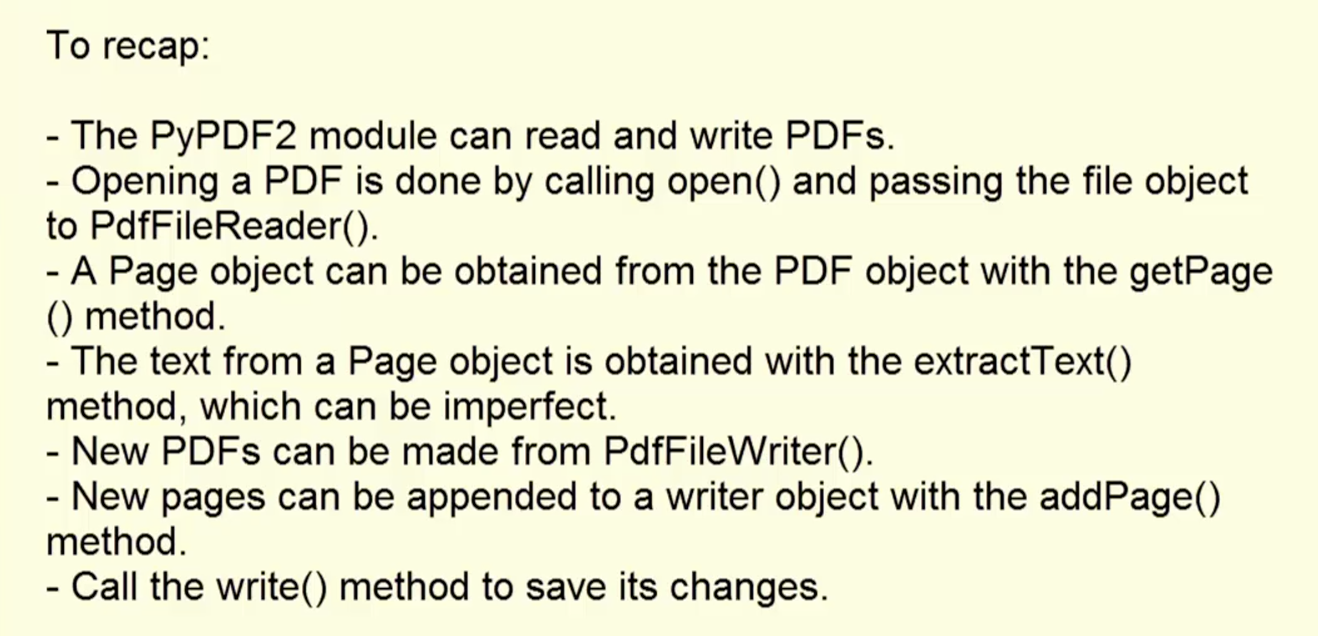

# Lesson 45: Reading and Editing Word Documents

- Document object contains Paragraph objects. 
- Paragraph objects contain Run objects.

[Online Chapter 13](https://automatetheboringstuff.com/chapter13/)

Run Objects in Doc.png

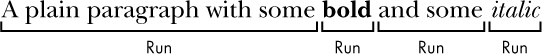

In [63]:
import docx

In [64]:
doc = docx.Document('demo.docx')

In [65]:
len(doc.paragraphs)

7

In [66]:
doc.paragraphs[0].text

'Document Title'

In [67]:
doc.paragraphs[1].text

'A plain paragraph having some bold and some italic.'

In [68]:
len(doc.paragraphs[1].runs)

4

In [69]:
doc.paragraphs[1].runs[0].text

'A plain paragraph having some '

In [70]:
doc.paragraphs[1].runs[1].text

'bold'

In [71]:
doc.paragraphs[1].runs[2].text

' and some '

In [72]:
doc.paragraphs[1].runs[3].text

'italic.'

In [78]:
p = doc.paragraphs[1]

In [79]:
p.runs[0].text

'A plain paragraph having some '

In [80]:
p.runs[1].text

'bold'

In [81]:
p.runs[1].bold

True

In [82]:
p.runs[3].italic

True

In [83]:
# Let's Change the style of our text
# And change the text to italic and underlined.

p.runs[3].underline = True
p.runs[3].text = 'italic and underlined.'

In [86]:
# Save new changes in new file

doc.save('demo2.docx')

In [87]:
p.style

_ParagraphStyle('Normal') id: 4674753480

In [88]:
# Change style to STYLE 

p.style = 'Title'

In [89]:
doc.save('demo3.docx')

### Create a new document

In [90]:
d = docx.Document()

In [91]:
d.add_paragraph('Hello this is a paragraph.')

In [92]:
d.add_paragraph('this is another paragraph')

In [93]:
d.save('demo4.docx')

In [96]:
d.paragraphs[0].text

'Hello this is a paragraph.'

In [99]:
p = d.paragraphs[0]
p.add_run(' This is a new run!')

In [100]:
d.paragraphs[0].text

'Hello this is a paragraph.This is a new run! This is a new run!'

In [101]:
p.runs[1].bold = True

In [102]:
d.paragraphs[0].text

'Hello this is a paragraph.This is a new run! This is a new run!'

In [103]:
d.save('demo5.docx')

### Program: Get all text

In [107]:
import docx

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [108]:
getText('demo5.docx')

'Hello this is a paragraph.This is a new run! This is a new run!\nthis is another paragraph'

In [110]:
getText('demo.docx')

'Document Title\nA plain paragraph having some bold and some italic.\nHeading, level 1\nIntense quote\nfirst item in unordered list\nfirst item in ordered list\n\n'

Lesson 45 Recap

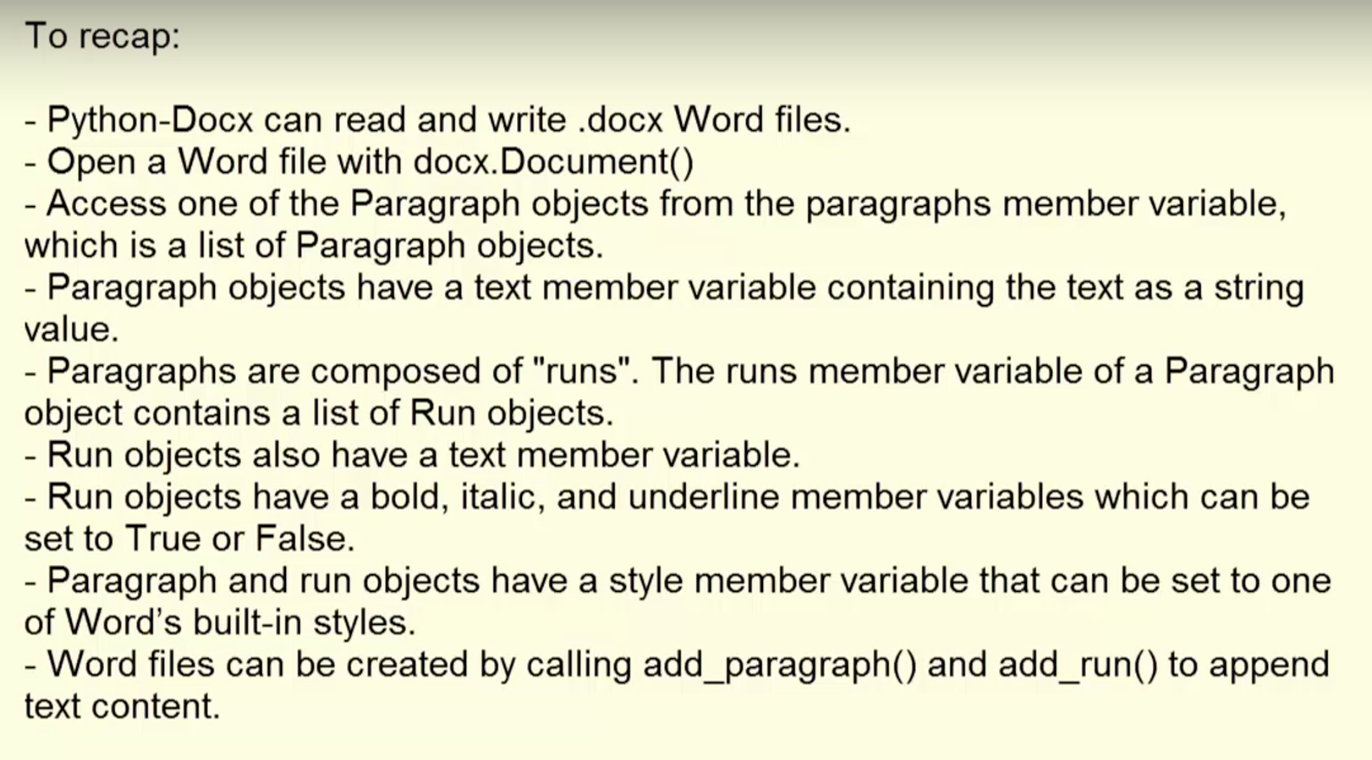